# Minify
Com base no exemplo magnify.ipynb que analise a interpolação no domínio da frequência na ampliação da imagem, fazer o mesmo para a redução da imagem. Use uma redução de 4x4: g = f[::4,::4]

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys,os
ia898path = os.path.abspath('/home/lotufo')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

## Considerem esta imagem para fazer a demonstração

Uma linha branca foi adicionada à imagem para poder ver melhor o efeito
da redução.

""
""

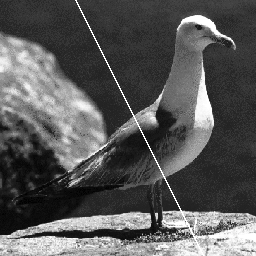

In [13]:
nb = ia.nbshow(2)
f = mpimg.imread('../../lotufo/ia898/data/gull.pgm')
r,c = np.indices(f.shape)
y = ia.normalize(r == c*2 - 150)
f = np.maximum(f, y)
y = ia.normalize(r == c*2 - 151)
f = np.maximum(f, y)
y = ia.normalize(r == c*2 - 152)
f = np.maximum(f, y)
nb.nbshow(f)
nb.nbshow()

## Esta é a redução sem interpolação

""
"(256, 256)"
""
"(64, 64)"

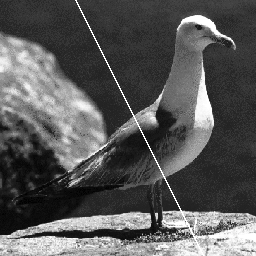
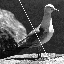

In [14]:
g = f[::4,::4]
nb.nbshow(f,'%s'% (f.shape,))
nb.nbshow(g,'%s'% (g.shape,))
nb.nbshow()

## Função comb

Será necessário a função `comb` para poder fazer esta demonstração.

Será necessário também ver outras propriedades da convolução e do teorema da convolução para poder fazer esta demonstração. Recomendo ler livros ou textos sobre esta explicação da interpretação no domínio da frequência da redução via interpolação.

""
""

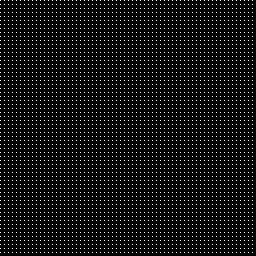

In [15]:
c = ia.comb((f.shape),(4,4),(0,0))
ia.adshow(ia.normalize(c))

""
Espectro da imagem original
""
Espectro do trêm de impulsos
""
Espectro resultante da convolução

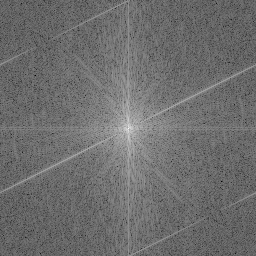
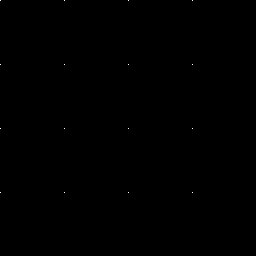
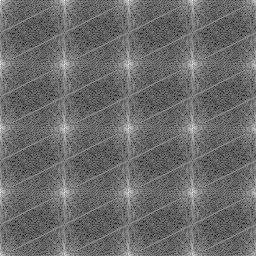

In [16]:
C = np.fft.fft2(c)
F = np.fft.fft2(f)
G2 = ia.pconv(F,C)
nb = ia.nbshow(3)
nb.nbshow(ia.dftview(F), 'Espectro da imagem original')
nb.nbshow(ia.dftview(C), 'Espectro do trêm de impulsos')
nb.nbshow(ia.dftview(G2), 'Espectro resultante da convolução')
nb.nbshow()

""
Imagem resultante
""
Imagem reduzida

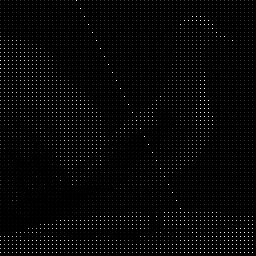
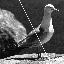

In [17]:
g2 = np.fft.ifft2(G2)
gReal = ia.normalize(g2.real) 
gMinified = gReal[::4,::4] 
nb.nbshow(gReal,'Imagem resultante')
nb.nbshow(gMinified, 'Imagem reduzida')
nb.nbshow()

In [18]:

print( 'A redução sem interpolação e a com interpolação possuem o mesmo resultado?\n ',(abs(gMinified-g)<10E-4).all() )

A redução sem interpolação e a com interpolação possuem o mesmo resultado?
  False


## Interpolação com filtro passa-baixa
É possível, também, realizar a redução da imagem utilizando um filtro passa-baixa. Esta abordagem é comumente utilizada para evitar o efeito de aliasing causado pela redução sem interpolação.

In [19]:
path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/d191122/Aula_6/')
if path not in sys.path:
    sys.path.append(path)
import ptrans as ptr

""
Espectro original
""
Filtro passa-baixo
""
Espectro Filtrado
""
imagem resultante
""
imagem resultante

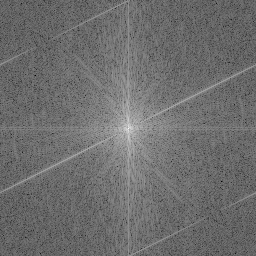
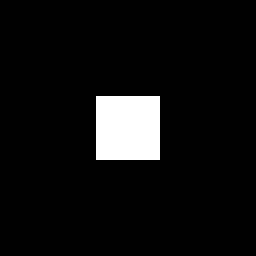
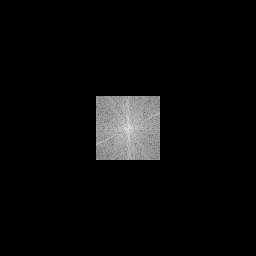
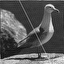
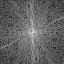

A redução sem interpolação e a com interpolação são iguais?
  False
As duas reduções são iguais?
  False


In [36]:
Hf = np.zeros_like(F)
Hfx = np.zeros_like(F)

H,W = F.shape
Hf[:H//(4),:W//(4)] = 1
#Ucut = H//(2*4) #frequência de corte em H
#Vcut = W//(2*4) #frequência de corte em W
#r,c = np.indices((H,W))
#Hfx[( ((r-H//2)/Ucut)**2 + ((c-W//2)/Vcut)**2)<1]=1
#Hfx = ptr.ptransfat(Hfx,(-H//(2),-W//(2))) 
Hf = ptr.ptransfat(Hf,(-H//(2*4),-W//(2*4)))
Gfh = (F * Hf)
gfh = np.fft.ifft2(Gfh)
gfh = ia.normalize(gfh.real)
gfh4 = gfh[::4,::4]

Gfh4 = np.fft.fft2(gfh4)

nb = ia.nbshow(3)
nb.nbshow(ia.dftview(F), 'Espectro original')
nb.nbshow(ia.dftview(Hf), 'Filtro passa-baixo')
nb.nbshow(ia.dftview(Gfh), 'Espectro Filtrado')
nb.nbshow(gfh4, 'imagem resultante')
nb.nbshow(ia.dftview(Gfh4), 'imagem resultante')
nb.nbshow()

print( 'A redução sem interpolação e a com interpolação são iguais?\n ',(abs(gfh4-g)<10E-4).all() )
print( 'As duas reduções são iguais?\n ',(abs(gMinified-gfh4)<10E-4).all() )